# Simple CNN model
## _NoCv93.75 %

## Load libraries

In [1]:
# Import all the necessary libraries
import glob
import cv2
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import sparse_categorical_crossentropy

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


## Load data


In [2]:
train_idg = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 30,  
    zoom_range = 0.2, 
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip = True,
)
test_idg = ImageDataGenerator(
    rescale = 1./255.
)
val_idg = ImageDataGenerator(
    rescale=1./255.
)

In [3]:
IMG_SIZE = (224, 224)

train = train_idg.flow_from_directory('./input/chest_xray/train', 
                                      class_mode='binary',
                                      color_mode="grayscale",
                                      target_size = IMG_SIZE
                                     )
test = test_idg.flow_from_directory('./input/chest_xray/test', 
                                    class_mode='binary',
                                    color_mode="grayscale",
                                    target_size = IMG_SIZE
                                   )
val = val_idg.flow_from_directory('./input/chest_xray/val',
                                  class_mode='binary',
                                  color_mode="grayscale",
                                  target_size = IMG_SIZE
                                 )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
trainX, trainY = train.next()
testX, testY = test.next()
valX, valY = val.next()

print(len(trainX), len(trainY))#32 32

32 32


In [5]:
print('Train X=%s Y=%s' %(trainX.shape, trainY.shape))
print('Test X=%s Y=%s' %(testX.shape, testY.shape))
print('Val X=%s Y=%s' %(valX.shape, valY.shape))

Train X=(32, 224, 224, 1) Y=(32,)
Test X=(32, 224, 224, 1) Y=(32,)
Val X=(16, 224, 224, 1) Y=(16,)


/home/prettyus17/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

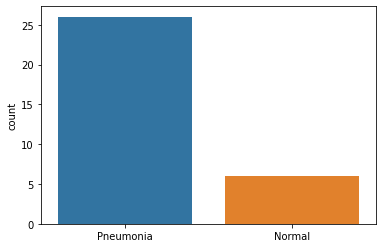

In [13]:
labels = ['Normal' if label == 0 else 'Pneumonia' for label in trainY]
sns.countplot(labels)

In [17]:
model = Sequential()
model.add(Conv2D(32 , (3,3)  , activation = 'relu' , input_shape = (224, 224,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               47776000  
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [15]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [17]:
history = model.fit(train ,batch_size=8, epochs = 20 , validation_data = val ,callbacks = [learning_rate_reduction])

Epoch 1/20
163/163 [==============================] - 204s 1s/step - loss: 0.3770 - accuracy: 0.8311 - val_loss: 0.6550 - val_accuracy: 0.6250
Epoch 2/20
163/163 [==============================] - 137s 842ms/step - loss: 0.2921 - accuracy: 0.8675 - val_loss: 1.0434 - val_accuracy: 0.6250
Epoch 3/20
163/163 [==============================] - ETA: 0s - loss: 0.2667 - accuracy: 0.8831
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 138s 845ms/step - loss: 0.2667 - accuracy: 0.8831 - val_loss: 1.0468 - val_accuracy: 0.6250
Epoch 4/20
163/163 [==============================] - 138s 845ms/step - loss: 0.2263 - accuracy: 0.9070 - val_loss: 0.8373 - val_accuracy: 0.7500
Epoch 5/20
163/163 [==============================] - 138s 847ms/step - loss: 0.2071 - accuracy: 0.9178 - val_loss: 0.6842 - val_accuracy: 0.7500
Epoch 6/20
163/163 [==============================] - 138s 845ms/step - loss: 0.2017 - accuracy: 0.9158 - va

In [18]:
print("Loss of the model is - " , model.evaluate(testX,testY)[0])
print("Accuracy of the model is - " , model.evaluate(testX,testY)[1]*100 , "%")

1/1 [==============================] - 0s 1ms/step - loss: 0.1482 - accuracy: 0.9375
Loss of the model is -  0.14821916818618774
1/1 [==============================] - 0s 1ms/step - loss: 0.1482 - accuracy: 0.9375
Accuracy of the model is -  93.75 %


# FOR CV_CNN

In [6]:
path = './input/chest_xray/'
# define paths
train_normal_dir = path + 'train/NORMAL/'
train_pneu_dir = path + 'train/PNEUMONIA/'

test_normal_dir = path + 'test/NORMAL/'
test_pneu_dir = path + 'test/PNEUMONIA/'

val_normal_dir = path + 'val/NORMAL/'
val_pneu_dir = path + 'val/PNEUMONIA/'

# find all files, our files has extension jpeg
train_normal_cases = glob.glob(train_normal_dir + '*jpeg') #1341
train_pneu_cases = glob.glob(train_pneu_dir + '*jpeg')#3875

test_normal_cases = glob.glob(test_normal_dir + '*jpeg')#234
test_pneu_cases = glob.glob(test_pneu_dir + '*jpeg')#390

val_normal_cases = glob.glob(val_normal_dir + '*jpeg')#8
val_pneu_cases = glob.glob(val_pneu_dir + '*jpeg')#8


# make path using / instead of \\ ... this may be redudant step
train_normal_cases = [x.replace('\\', '/') for x in train_normal_cases]
train_pneu_cases = [x.replace('\\', '/') for x in train_pneu_cases]
test_normal_cases = [x.replace('\\', '/') for x in test_normal_cases]
test_pneu_cases = [x.replace('\\', '/') for x in test_pneu_cases]
val_normal_cases = [x.replace('\\', '/') for x in val_normal_cases]
val_pneu_cases = [x.replace('\\', '/') for x in val_pneu_cases]

In [7]:
# create lists for train, test & validation cases, create labels as well
train_list = []
test_list = []
val_list = []

for x in train_normal_cases:
    train_list.append([x, 0])

for x in train_pneu_cases:
    train_list.append([x, 1])  

for x in test_normal_cases:
    test_list.append([x, 0])  

for x in test_pneu_cases:
    test_list.append([x, 1])  

for x in val_normal_cases:
    val_list.append([x, 0])  

for x in val_pneu_cases:
    val_list.append([x, 1])

In [8]:
# shuffle/randomize data as they were loaded in order: normal cases, then pneumonia cases
random.shuffle(train_list)
random.shuffle(test_list)
random.shuffle(val_list)

In [9]:
# create dataframes
train_df = pd.DataFrame(train_list, columns=['image', 'label'])
test_df = pd.DataFrame(test_list, columns=['image', 'label'])
val_df = pd.DataFrame(val_list, columns=['image', 'label'])

In [10]:
def process_data(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img/255.0
    img = np.reshape(img, (224, 224,1))
   
    return img

def compose_dataset(df):
    data = []
    labels = []

    for img_path, label in df.values:
        data.append(process_data(img_path))
        labels.append(label)
       
    return np.array(data), np.array(labels)

In [11]:
X_train, y_train = compose_dataset(train_df)
X_test, y_test = compose_dataset(test_df)
X_val, y_val = compose_dataset(val_df)

print('Train data shape: {}, Labels shape: {}'.format(X_train.shape, y_train.shape))
print('Test data shape: {}, Labels shape: {}'.format(X_test.shape, y_test.shape))
print('Validation data shape: {}, Labels shape: {}'.format(X_val.shape, y_val.shape))

Train data shape: (5216, 224, 224, 1), Labels shape: (5216,)
Test data shape: (624, 224, 224, 1), Labels shape: (624,)
Validation data shape: (16, 224, 224, 1), Labels shape: (16,)


In [12]:
# define generator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

# fit generator on our train features
datagen.fit(X_train)

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [14]:
kfold = KFold(n_splits=5, shuffle=True)

# Model configuration
img_width, img_height, img_num_channels = 224, 224, 1 #gray image channel = 1
loss_function = sparse_categorical_crossentropy
acc_per_fold = []
loss_per_fold = []

In [33]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32 , (3,3)  , activation = 'relu' , input_shape = (224, 224,1)))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) 
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='softmax'))##sigmoid or softmax 
    # compile model
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    ## 최적화 adam or rmsprop..+loss sparse_categorical_crossentropy or binary
    return model

In [ ]:
for i, (train, test) in enumerate(kfold.split(X_train, y_train), 1):
   
    print(f'Training model for Kfold #{i}')
    callback = EarlyStopping(monitor='loss', patience=6)
   
    model = get_model()

    # Fit data to model
    #model.fit(datagen.flow(X_train[train], y_train[train], batch_size=4),
    history = model.fit(X_train[train], y_train[train],
                        batch_size = 8,
                        epochs=20,
                        callbacks=[callback],
                        verbose = 1,
                        class_weight={0:6.0, 1:0.5}
                       )
   
    scores = model.evaluate(X_train[test], y_train[test], verbose=0)
    print(f'Score for fold {i}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
   
    filename = './models/model_Diseasecnn' + str(i) + '.h5'
    model.save(filename)
    print('>Saved %s' % filename)

training model for Kfold #1


In [ ]:
# == Provide average scores ==
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
    print(f'> Loss: {np.mean(loss_per_fold)}')
    print('------------------------------------------------------------------------')

In [ ]:
acc_per_fold

In [ ]:
def average(list):

    return (sum(list) / len(list))

print("Test acc : {}".format(average(acc_per_fold)));